In [73]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 경고 메세지가 나타났을 때 경고 메세지를 무시하고 숨길 수 있는 기능
import warnings
warnings.filterwarnings("ignore")

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# iris 데이터를 로딩, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                   test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [11]:
from sklearn.tree import export_graphviz

# export_graphviz()는 graphviz가 읽고 그래프 형태로 시각화 할 수 있는 출력파일 생성
# export_graphviz()의 호출 결과로 out_file로 저장된 tree.dot 파일을 생성함
# export_graphviz()에 인자로 학습이 완료된 estimator, output 파일명,
# 결정 클래스의 명칭, 피처의 명칭을 입력해주면 됨.
export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names,
               feature_names = iris_data.feature_names, impurity=True, filled=True)

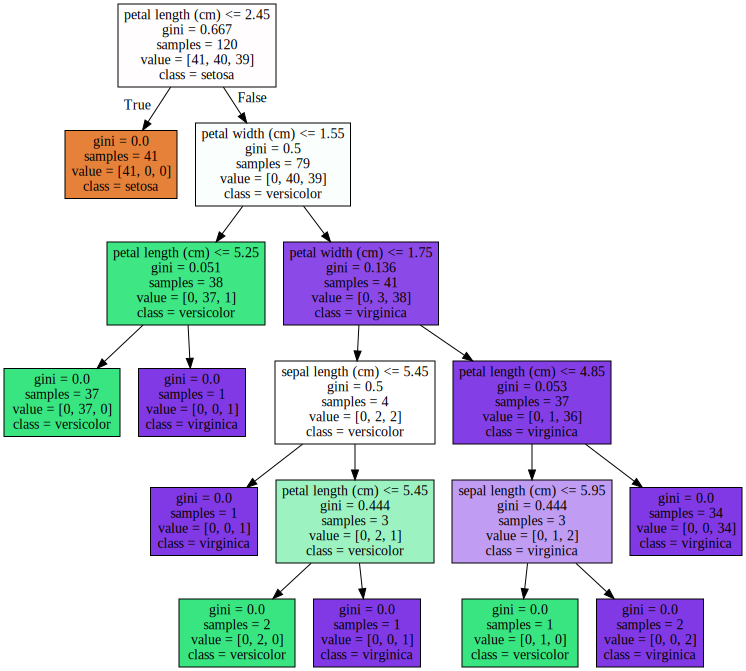

In [12]:
import graphviz

# 위에서 생성한 tree.dot 파일을 Graphviz로 읽어서 Jupyter Notebook 상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [14]:
df_clf = DecisionTreeClassifier(max_depth = 3, random_state=156)
df_clf = DecisionTreeClassifier(min_samples_splits=4, random_state=156)
df_clf = DecisionTreeClassifier(min_samples_leaf=4, random_state=156)

Feature importances [0.025 0.    0.555 0.42 ]
sepal length (cm):0.025
sepal width (cm):0.000
petal length (cm):0.555
petal width (cm):0.420


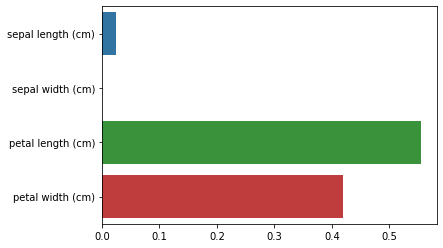

In [22]:
import seaborn as sns
import numpy as np
# 브라우저 내부에서 도표나 그림을 볼 수 있게 해주는 코드
%matplotlib inline

# feature importance 추출
print("Feature importances {}".format(np.round(dt_clf.feature_importances_,3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print("{0}:{1:.3f}".format(name,value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)

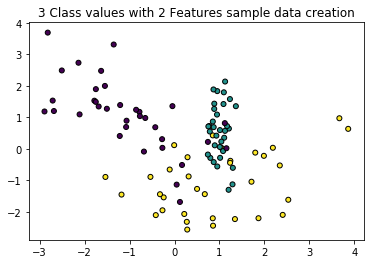

In [36]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
# make_classification 함수는 분류를 위한 테스트용 데이터를 쉽게 만들 수 있게 끔 해줌

plt.title("3 Class values with 2 Features sample data creation")

X_features, y_labels = make_classification(n_features=2, n_redundant=0,
                                    n_informative=2, n_classes=3,
                                          n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:,0],X_features[:,1], marker="o",c=y_labels, s=25,
           edgecolor="k")

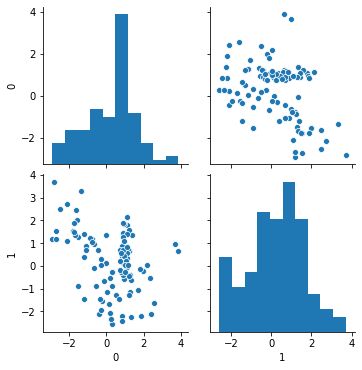

In [37]:
import pandas as pd
sns.pairplot(pd.DataFrame(X_features))

In [38]:
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

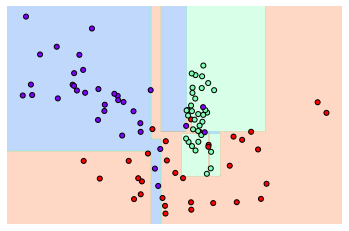

In [39]:
visualize_boundary(dt_clf, X_features, y_labels)

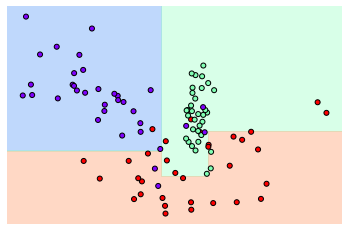

In [42]:
dt_clf = DecisionTreeClassifier(min_samples_leaf = 6).fit(X_features,y_labels)

# min_samples leaf를 6으로 설정
# 즉, 6개 이하의 데이터는 리프 노드를 형성 할 수 있게끔 리프 노드 생성 규칙을 완화

visualize_boundary(dt_clf, X_features, y_labels)

In [43]:
import os
os.chdir("C:/Users/이혜림/Desktop/Bita5/9주차/UCI HAR Dataset/human_activity")

In [60]:
# features.txt 파일을 DataFrame으로 업로드하여 features.txt 파일 내 피처 영향 확인
feature_name_df = pd.read_csv("./features.txt", sep=" ",header=None,
                            names=["feature_index", "feature_name"])

In [62]:
feature_name = feature_name_df["feature_name"].to_list()
print(feature_name[:10])

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [70]:
feature_dup_df=feature_name_df.groupby("feature_name").count()
print(feature_dup_df[feature_dup_df["feature_index"]>1].count())
print(feature_dup_df[feature_dup_df["feature_index"]>1].head())

feature_index    42
dtype: int64
                              feature_index
feature_name                               
fBodyAcc-bandsEnergy()-1,16               3
fBodyAcc-bandsEnergy()-1,24               3
fBodyAcc-bandsEnergy()-1,8                3
fBodyAcc-bandsEnergy()-17,24              3
fBodyAcc-bandsEnergy()-17,32              3


In [110]:
pd.DataFrame(feature_name_df.groupby("feature_name").cumcount(), columns=["dup"]).reset_index()

,index,dup
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
556,556,0
557,557,0
558,558,0
559,559,0


In [95]:
feature_dup_df=(feature_name_df.groupby("feature_name").count()>1)

In [107]:
sum(feature_dup_df["feature_index"])

42

In [111]:
feature_name_df

,feature_index,feature_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [115]:
def get_new_feature_name_df(old_feature_name_df):
    # 기존의 DataFrame의 중복된 피처명에 대해서 적용
    
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby("feature_name").cumcount(),columns=["dup_cnt"])
    
    feature_dup_df = feature_dup_df.reset_index()
    
    # 기준을 정해주지 않았기 때문에 index를 기준으로 merge 해줌
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(),
                                  feature_dup_df, how="outer")
    
    new_feature_name_df["feature_name"]=new_feature_name_df[["feature_name","dup_cnt"]].apply(lambda x:x[0]+"_"+str(x[1]) if x[1]>0 else x[0], axis=1)
    
    new_feature_name_df.drop(["index"], axis=1, inplace=True)
    
    return new_feature_name_df

In [124]:
def get_human_dataset():
    feature_name_df = pd.read_csv("./features.txt", sep=" ",header=None,
                                 names = ["feature_index", "feature_name"])
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    X_train = pd.read_csv("./train/X_train.txt", sep="\s+",names = feature_name)
    
    X_test = pd.read_csv("./test/X_test.txt", sep="\s+", names = feature_name)
    
    y_train = pd.read_csv("./train/y_train.txt", sep="\s+", header=None,
                         names = ["action"])
    y_test = pd.read_csv("./test/y_test.txt",sep="\s+", header = None,
                        names = ["action"])
    
    
    return X_train, X_test, y_train, y_test
    

In [125]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [132]:
from sklearn.metrics import accuracy_score
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)

accuracy = accuracy_score(y_test,pred)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [140]:
from sklearn.model_selection import GridSearchCV

params = {"max_depth":[6,8,10,12,16,20,24]}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring="accuracy", cv=5,
                      verbose=3)

grid_cv.fit(X_train, y_train)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] max_depth=6 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......................... max_depth=6, score=0.813, total=   2.1s
[CV] max_depth=6 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ......................... max_depth=6, score=0.871, total=   2.2s
[CV] max_depth=6 .....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s


[CV] ......................... max_depth=6, score=0.799, total=   2.1s
[CV] max_depth=6 .....................................................
[CV] ......................... max_depth=6, score=0.874, total=   2.1s
[CV] max_depth=6 .....................................................
[CV] ......................... max_depth=6, score=0.869, total=   2.1s
[CV] max_depth=8 .....................................................
[CV] ......................... max_depth=8, score=0.820, total=   2.6s
[CV] max_depth=8 .....................................................
[CV] ......................... max_depth=8, score=0.840, total=   2.5s
[CV] max_depth=8 .....................................................
[CV] ......................... max_depth=8, score=0.819, total=   2.5s
[CV] max_depth=8 .....................................................
[CV] ......................... max_depth=8, score=0.868, total=   2.6s
[CV] max_depth=8 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=6,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
           

In [142]:
pd.DataFrame(grid_cv.cv_results_)[["param_max_depth","mean_test_score"]]

,param_max_depth,mean_test_score
0,6,0.845213
1,8,0.848073
2,10,0.848619
3,12,0.844538
4,16,0.846850
5,20,0.847801
6,24,0.844674


In [145]:
for depth in params["max_depth"]:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    
    dt_clf.fit(X_train, y_train)
    
    pred = dt_clf.predict(X_test)
    
    accuracy = accuracy_score(y_test,pred)
    
    print("max_depth = {0} 정확도 : {1:.4f}".format(depth,accuracy))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

max_depth = 6 정확도 : 0.8558


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

max_depth = 8 정확도 : 0.8707


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

max_depth = 10 정확도 : 0.8673


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

max_depth = 12 정확도 : 0.8646


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

max_depth = 16 정확도 : 0.8575


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

max_depth = 20 정확도 : 0.8548


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

max_depth = 24 정확도 : 0.8548


In [146]:
print(grid_cv.best_score_, grid_cv.best_params_)

0.8486186915282768 {'max_depth': 10}


In [147]:
best_df_clf = grid_cv.best_estimator_

pred1 = best_df_clf.predict(X_test)

accuracy = accuracy_score(y_test, pred1)

print(accuracy)

0.8778418730912793


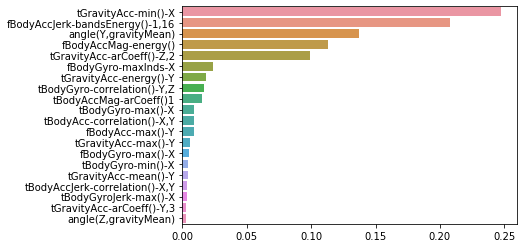

In [160]:
fit_importances_values = best_df_clf.feature_importances_

fit_importances = pd.Series(fit_importances_values, index = X_train.columns)

sns.barplot(x=fit_importances.sort_values(ascending=False)[:20],
           y=fit_importances.sort_values(ascending=False)[:20].index)


plt.show()

In [155]:
fit_importances

tBodyAcc-mean()-X                       0.000000
tBodyAcc-mean()-Y                       0.000000
tBodyAcc-mean()-Z                       0.000000
tBodyAcc-std()-X                        0.000000
tBodyAcc-std()-Y                        0.000000
                                          ...   
angle(tBodyGyroMean,gravityMean)        0.000000
angle(tBodyGyroJerkMean,gravityMean)    0.000000
angle(X,gravityMean)                    0.000000
angle(Y,gravityMean)                    0.137239
angle(Z,gravityMean)                    0.002920
Length: 561, dtype: float64